<a href="https://colab.research.google.com/github/deepikasmofficial/my-portfolio/blob/main/OIBSIP_Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Version 1 – Sample Dataset**


This is a small 5-message dataset used for basic testing.

In [2]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Create a small dataset directly
data = {
    "label": ["ham", "spam", "ham", "spam", "ham"],
    "message": [
        "Hey, are we still meeting for lunch today?",
        "Congratulations! You've won a free ticket. Call now!",
        "Don't forget to bring the documents.",
        "Get cheap loans NOW! Click here to apply.",
        "Can you send me the assignment?"
    ]
}

df = pd.DataFrame(data)

# Step 3: View the dataset
print("First few messages:")
print(df)

# Step 4: Convert labels to binary (spam = 1, ham = 0)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 5: Separate features and target
X = df['message']
y = df['label_num']

# Step 6: Text vectorization
cv = CountVectorizer()
X_vectorized = cv.fit_transform(X)

# Step 7: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Step 8: Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = model.predict(X_test)

# Step 10: Show results
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


First few messages:
  label                                            message
0   ham         Hey, are we still meeting for lunch today?
1  spam  Congratulations! You've won a free ticket. Cal...
2   ham               Don't forget to bring the documents.
3  spam          Get cheap loans NOW! Click here to apply.
4   ham                    Can you send me the assignment?

Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



# **Version 2 – Full Dataset (SMS Spam Collection)**
This is the real dataset with 5,500+ messages for better results.


First 5 rows:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Class distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

Accuracy Score: 0.9856502242152466

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.94      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



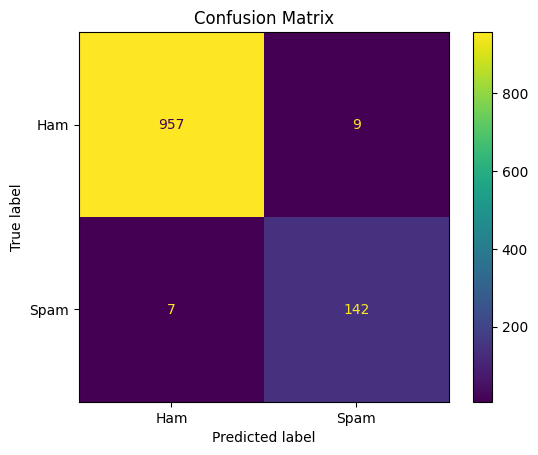

In [5]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Step 2: Load the dataset (TSV format)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Step 3: View dataset info
print("First 5 rows:")
print(df.head())

# Step 4: Convert labels to numeric values
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 5: Check class balance
print("\nClass distribution:")
print(df['label'].value_counts())

# Step 6: Split features and target
X = df['message']
y = df['label_num']

# Step 7: Vectorize the messages
cv = CountVectorizer()
X_vectorized = cv.fit_transform(X)

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Step 9: Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 10: Make predictions
y_pred = model.predict(X_test)

# Step 11: Evaluate the model
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 12: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()
